In [3]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

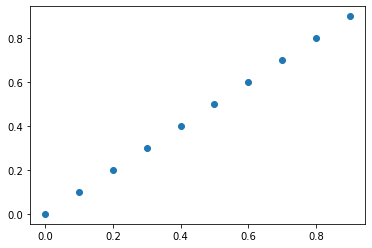

In [4]:
#Making a set of data and time
y = np.arange(0,1,0.1)
t = np.arange(0,1,0.1)

plt.plot(t,y, 'o')

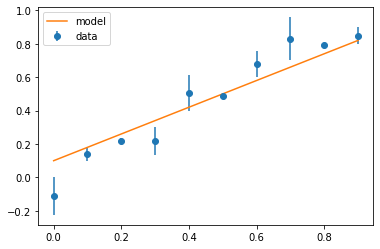

In [5]:
#Adding withe noise to the set of data
noise = np.random.normal( 0, 0.1, y.shape)
signal = y + noise

#Creating a line function
def line(a,b,t):
    f = a + b*t
    return f

a = 0.1
b = 0.8
f = line(a,b,t)

#Plotting with error bars
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t, f, label = "model")
plt.legend()
plt.show()

# Gaussian Likelihood


$ L = P(D|M) = \left[ \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right]exp\left[ \sum_{i =1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right] $

## Taking the natural log to the Gaussian Likelihood:


$ \ln(L) = \sum_{i = 1}^{n}  \ln \left[ \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right] + \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} $

$ log(L) = \sum_{i=1}^{n} \left[ \ln \left( \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right) + \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

In [10]:
#Defining a function for the logarithmic Gaussian likelihood
def lolik(signal, f):
    loli = []
    i = 1
    for i in range(0,len(t)):
        f[i] = a + b*t[i]
        loli.append(np.log(1/np.sqrt(2*np.pi*noise[i]**2)) + ((signal[i] - f[i])**2)/(2*(noise[i]**2)))
        i = i +1
    return loli

In [11]:
loli = lolik(signal,f)

In [12]:
print(type(loli))

<class 'list'>


In [13]:
print(loli)

[3.0554780956606704, 2.759582939238558, 6.477651344189868, 2.6471294952970306, 1.6400944978771808, 3.917428475738226, 2.4288374362869005, 1.9838164457965306, 62.839777638519735, 2.1842082663581563]


In [15]:
#Converting to a numpy array
log_like = np.array(loli)

[ 3.0554781   2.75958294  6.47765134  2.6471295   1.6400945   3.91742848
  2.42883744  1.98381645 62.83977764  2.18420827]
<class 'numpy.ndarray'>


In [29]:
#Maximizing the likelihood
lik_model = minimize(lolik,(signal,f), method='L-BFGS-B')

TypeError: lolik() missing 1 required positional argument: 'f'